In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('palm_ffb.csv')
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [4]:
df.shape

(130, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [6]:
#  list of discrete variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
discrete_vars = [var for var in num_vars if len(df[var].unique())<10]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


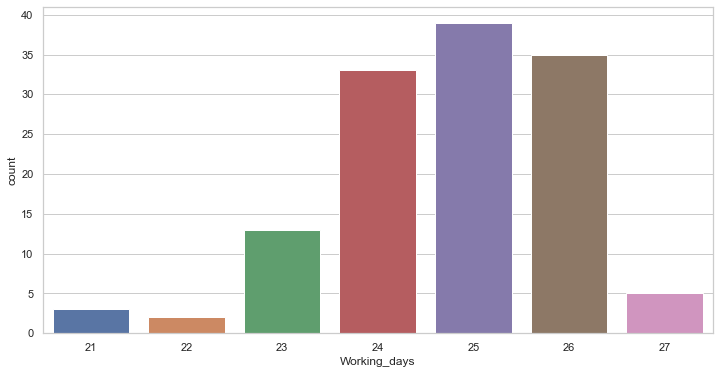

In [7]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = df)
plt.savefig("task_2_working_days_countplot.jpg",bbox_inches ="tight")

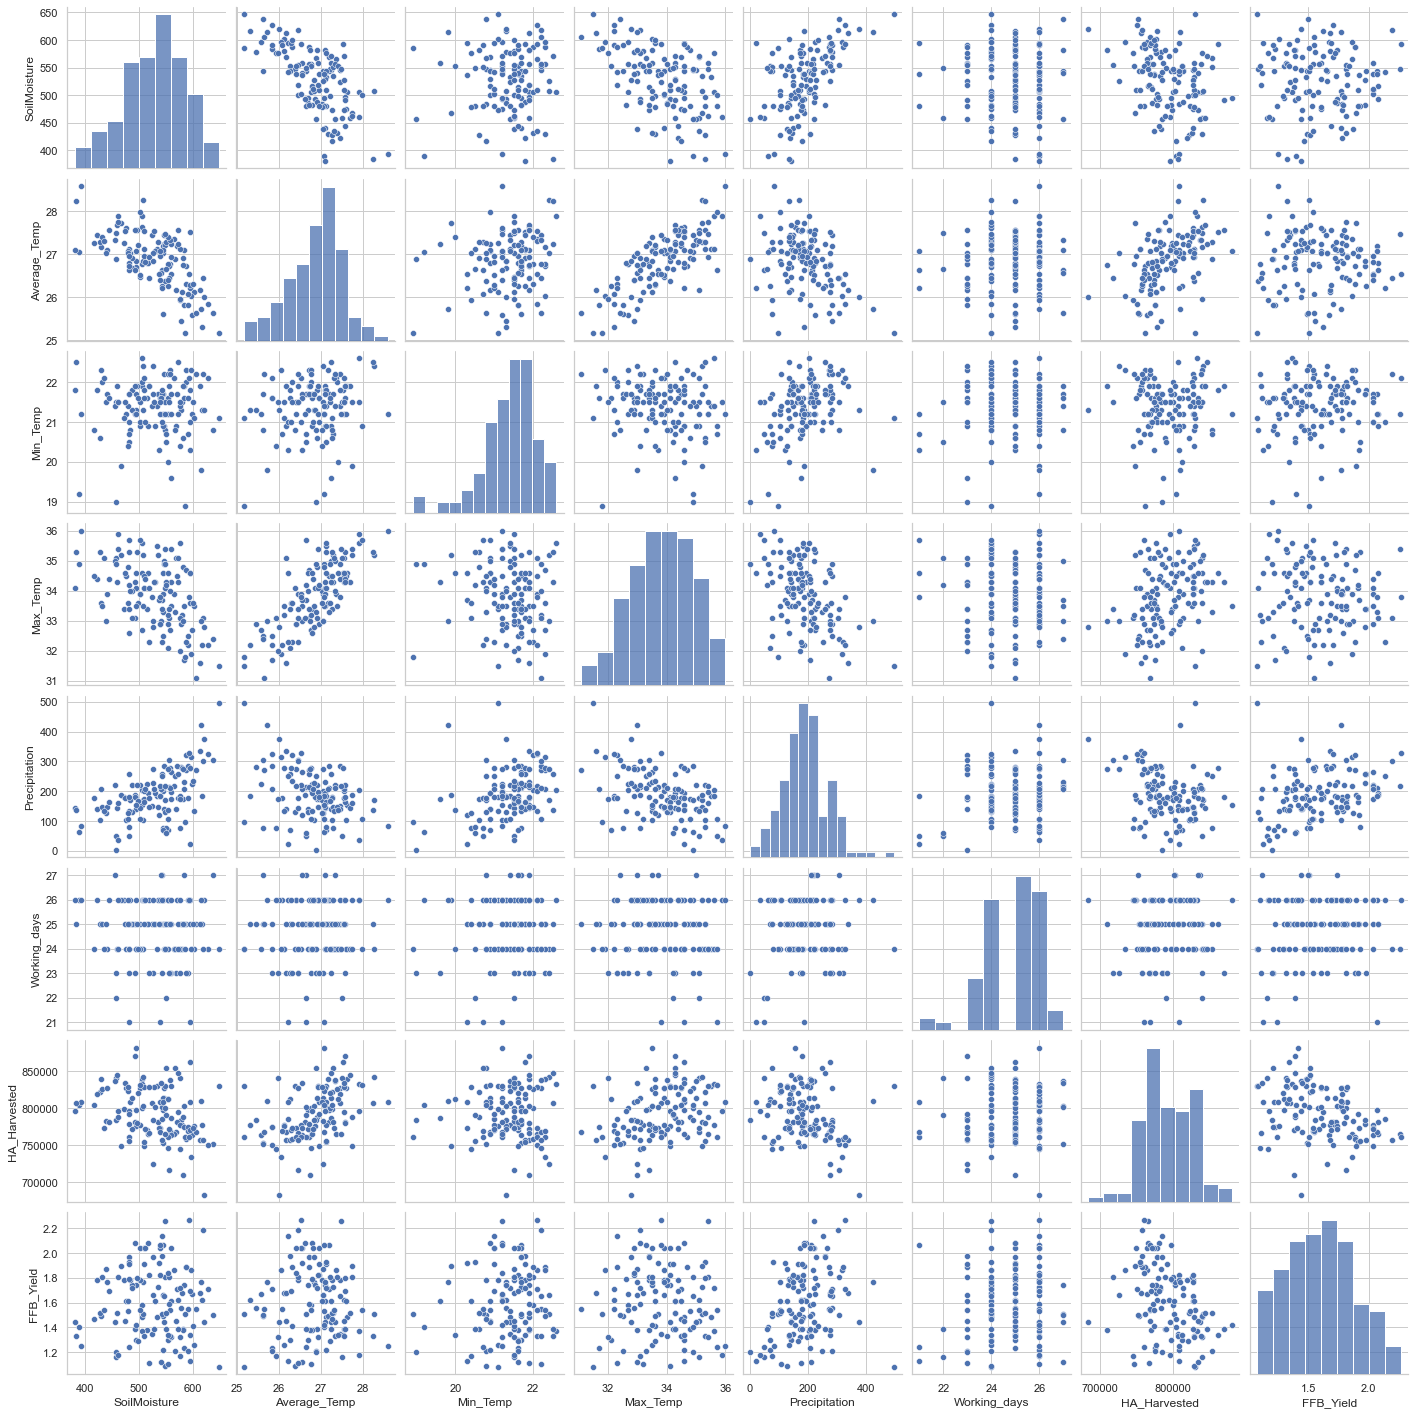

In [8]:
sns.pairplot(df)
plt.savefig("task_2_pairplot.jpg",bbox_inches ="tight")

In [9]:
df_nodate = df.drop(columns='Date')

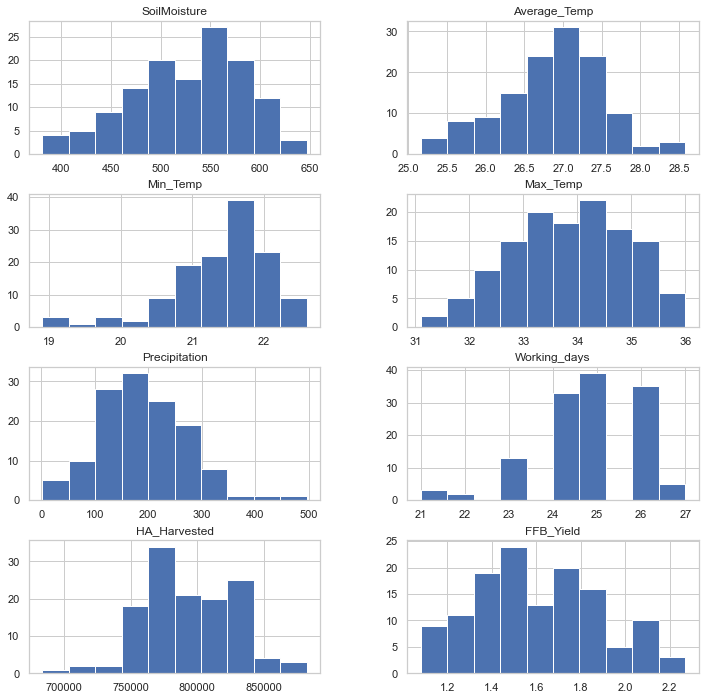

In [10]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df_nodate.columns)//2, 2, figsize=(12,12))
''
i = 0
for triaxis in axes:
    for axis in triaxis:
        df_nodate.hist(column = df_nodate.columns[i], ax=axis)
        i = i+1
        
plt.savefig("task_2_hist.jpg",bbox_inches ="tight")

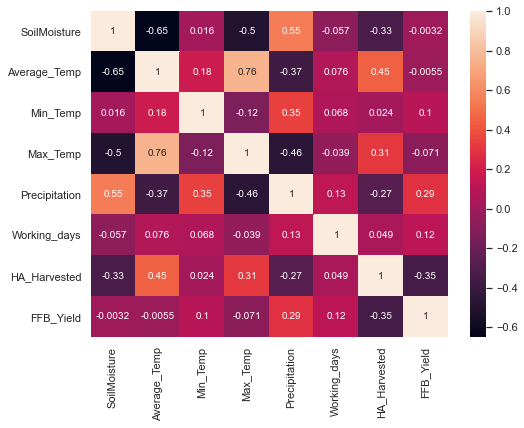

In [11]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_nodate.corr(), annot=True)
plt.savefig("Task_2_corr.jpg",bbox_inches ="tight")

In [12]:
#Correlation with output variable
cor_target = abs(df_nodate.corr()["FFB_Yield"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Min_Temp         0.103830
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64

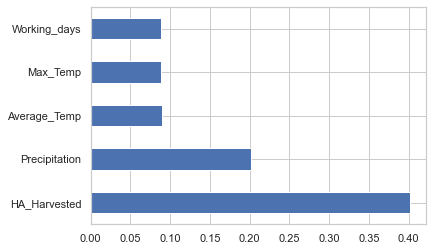

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [13]:
from xgboost import XGBRegressor

X = df.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = df.FFB_Yield    #target column i.e FFB_Yield

xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

print(imp)